<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20045_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Derivation of the Linear Operator $H$ and Mode Shapes**

### **1. Physical Boundary Conditions**
For a beam of length $L$ in a **Pinned-Free** configuration, the boundary conditions are defined as follows:

* **At $x = 0$ (Pinned End):**
    * $y(0, t) = 0$ (Zero displacement)
    * $\frac{\partial^2 y}{\partial x^2}(0, t) = 0$ (Zero bending moment)
* **At $x = L$ (Free End):**
    * $\frac{\partial^2 y}{\partial x^2}(L, t) = 0$ (Zero bending moment)
    * $\frac{\partial^3 y}{\partial x^3}(L, t) = 0$ (Zero shear force)



---

### **2. The Linear Operator $H$**
The transverse vibration of the beam is governed by the partial differential equation:
$$\frac{\partial^2 y}{\partial t^2} + Hy = \frac{q(t,x)}{\rho A}$$

Assuming the axial force $P_o = 0$, the linear operator $H$ is defined as:
$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$$

---

### **3. Eigenvalue Problem and Mode Shape Derivation**
We assume a harmonic solution of the form $y(x, t) = \psi(x) e^{i\omega t}$. Substituting this into the unforced, undamped equation yields the eigenvalue problem:
$$H\psi = \omega^2 \psi$$

Let $\beta^4 = \frac{\omega^2 \rho A}{EI}$. The general solution for the mode shape $\psi(x)$ is:
$$\psi(x) = A \sin(\beta x) + B \cos(\beta x) + C \sinh(\beta x) + D \cosh(\beta x)$$

#### **Applying Boundary Conditions at $x = 0$:**
1. $\psi(0) = 0 \implies B + D = 0 \implies D = -B$
2. $\psi''(0) = 0 \implies \beta^2(-B + D) = 0 \implies -B - B = 0 \implies B = 0, D = 0$

Thus, the mode shape simplifies to:
$$\psi(x) = A \sin(\beta x) + C \sinh(\beta x)$$

---

### **4. Characteristic Equation**
Applying the boundary conditions at the free end $x = L$:

1. **Moment condition:** $\psi''(L) = 0 \implies -\beta^2 A \sin(\beta L) + \beta^2 C \sinh(\beta L) = 0$
   $$C = A \frac{\sin(\beta L)}{\sinh(\beta L)}$$

2. **Shear condition:** $\psi'''(L) = 0 \implies -\beta^3 A \cos(\beta L) + \beta^3 C \cosh(\beta L) = 0$

Substituting $C$ into the shear condition:
$$-A \cos(\beta L) + A \frac{\sin(\beta L)}{\sinh(\beta L)} \cosh(\beta L) = 0$$

Dividing by $A$ and rearranging gives the **Characteristic Equation**:
$$\tan(\beta L) = \tanh(\beta L)$$

---

### **5. Final Modal Functions**
The $k$-th mode shape $\psi_k(x)$ is defined as:
$$\psi_k(x) = A_k \left[ \sin(\beta_k x) + \frac{\sin(\beta_k L)}{\sinh(\beta_k L)} \sinh(\beta_k x) \right]$$

The first two numerical roots for $\beta_k L$ are:
* **Mode 1:** $\beta_1 L \approx 3.9266$
* **Mode 2:** $\beta_2 L \approx 7.0686$

Mode 1 Eigenvalue (beta*L): 3.9266 | Frequency: 53.00 Hz
Mode 2 Eigenvalue (beta*L): 7.0686 | Frequency: 171.75 Hz


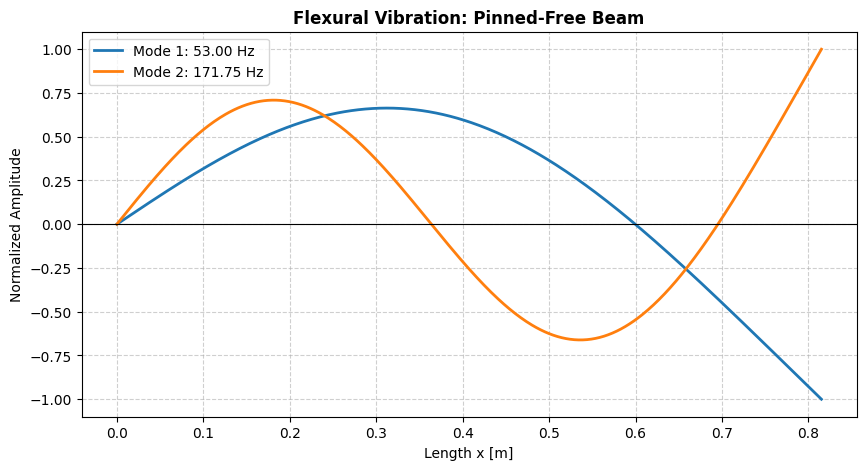

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

class BeamAnalyzer:
    """Class to perform modal analysis on a Pinned-Free beam."""

    def __init__(self, L, m, E, width, thickness):
        self.L = L
        self.rho_A = m / L
        self.I = (width * thickness**3) / 12
        self.EI = E * self.I
        self.stiffness_const = np.sqrt(self.EI / self.rho_A)

    def characteristic_function(self, betaL):
        """Characteristic equation for Pinned-Free beam: tan(betaL) = tanh(betaL)"""
        # Formulated as sin(x)cosh(x) - cos(x)sinh(x) = 0 for numerical stability
        return np.sin(betaL) * np.cosh(betaL) - np.cos(betaL) * np.sinh(betaL)

    def solve_eigenvalues(self, n_modes=2):
        """Finds the first n roots of the characteristic equation."""
        roots = []
        # Scanning intervals to locate sign changes for the solver
        search_points = np.linspace(0.1, 15, 1000)
        for i in range(len(search_points) - 1):
            a, b = search_points[i], search_points[i+1]
            if self.characteristic_function(a) * self.characteristic_function(b) < 0:
                roots.append(brentq(self.characteristic_function, a, b))
            if len(roots) == n_modes:
                break
        return np.array(roots)

    def compute_mode(self, x, betaL):
        """Calculates and normalizes the mode shape."""
        beta = betaL / self.L
        # The coefficient ratio (C/A) for Pinned-Free
        sigma = np.sin(betaL) / np.sinh(betaL)
        psi = np.sin(beta * x) + sigma * np.sinh(beta * x)
        return psi / np.max(np.abs(psi))

    def get_freq_hz(self, betaL):
        """Converts eigenvalue to natural frequency in Hertz."""
        omega = (betaL / self.L)**2 * self.stiffness_const
        return omega / (2 * np.pi)

# --- Configuration and Execution ---
params = {
    'L': 0.815, 'm': 1.65, 'E': 2e11,
    'width': 0.025, 'thickness': 0.01
}

beam = BeamAnalyzer(params['L'], params['m'], params['E'], params['width'], params['thickness'])
roots = beam.solve_eigenvalues(2)

# Plotting Results
x_vals = np.linspace(0, params['L'], 500)
plt.figure(figsize=(10, 5))

for i, root in enumerate(roots):
    f_hz = beam.get_freq_hz(root)
    y_mode = beam.compute_mode(x_vals, root)
    plt.plot(x_vals, y_mode, label=f'Mode {i+1}: {f_hz:.2f} Hz', linewidth=2)
    print(f"Mode {i+1} Eigenvalue (beta*L): {root:.4f} | Frequency: {f_hz:.2f} Hz")

plt.title('Flexural Vibration: Pinned-Free Beam', fontweight='bold')
plt.xlabel('Length x [m]')
plt.ylabel('Normalized Amplitude')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.show()

## **Derivation of the Decoupled 2-DOF Modal Model with Attachments**

---

## **1. Physical System Parameters**

### **Beam Properties**

- Length: $L = 0.815 \ \text{m}$
- Total Mass: $m_{\text{beam}} = 1.65 \ \text{kg}$
- Width: $b = 0.025 \ \text{m}$
- Thickness: $h = 0.01 \ \text{m}$
- Young’s Modulus: $E = 2 \times 10^{11} \ \text{Pa}$

Cross-sectional area:

$$
A = bh
$$

Second moment of area:

$$
I = \frac{bh^3}{12}
$$

Flexural rigidity:

$$
EI \approx 416.67 \ \text{Nm}^2
$$

---

### **Discrete Attachments**

- Spring stiffness:  
  $$
  k_s = 3800 \ \text{N/m}
  $$
  Located at $l_s = 0.75 \ \text{m}$

- Effective spring mass (including $1/3$ spring mass + attachment):
  $$
  m_{s,\text{eff}} = 0.1383 \ \text{kg}
  $$

- Exciter mass:
  $$
  m_e = 4.2 \ \text{kg}
  $$
  Located at $l_e = 0.4 \ \text{m}$

- Damper mass:
  $$
  m_d = 0.53 \ \text{kg}
  $$
  Located at $l_d = 0.2 \ \text{m}$

---

## **2. Modal Approximation**

The transverse displacement is approximated using the first two flexural modes of the pinned-free beam:

$$
y(x,t) = \psi_1(x) z_1(t) + \psi_2(x) z_2(t)
$$

where:

- $\psi_1(x), \psi_2(x)$ = mode shapes  
- $z_1(t), z_2(t)$ = modal coordinates  

Because the modes are orthogonal, the system decouples in modal space.

---

## **3. Modal Mass Matrix**

The total modal mass for mode $k$ includes:

1. Distributed beam mass  
2. Discrete inertial contributions  

$$
M_k =
\int_0^L \rho A \, \psi_k^2(x)\, dx
+ m_{s,\text{eff}} \psi_k^2(l_s)
+ m_e \psi_k^2(l_e)
+ m_d \psi_k^2(l_d)
$$

Since the modes are orthogonal:

$$
\mathbf{M} =
\begin{bmatrix}
M_1 & 0 \\
0 & M_2
\end{bmatrix}
$$

---

## **4. Modal Stiffness Matrix**

The modal stiffness consists of:

1. Internal bending energy of the beam  
2. External spring potential energy  

$$
K_k =
\int_0^L
EI \left( \psi_k''(x) \right)^2 dx
+
k_s \psi_k^2(l_s)
$$

Using the beam eigenvalue relation:

$$
EI \psi_k'''' = \rho A \omega_{\text{beam},k}^2 \psi_k
$$

The internal stiffness term simplifies to:

$$
\omega_{\text{beam},k}^2 M_{\text{beam},k}
$$

Thus the stiffness matrix is diagonal:

$$
\mathbf{K} =
\begin{bmatrix}
K_1 & 0 \\
0 & K_2
\end{bmatrix}
$$

---

## **5. Equations of Motion in Modal Space**

The decoupled 2-DOF system becomes:

$$
\mathbf{M}\ddot{\mathbf{z}} + \mathbf{K}\mathbf{z} = \mathbf{Q}(t)
$$

Expanded form:

$$
\begin{bmatrix}
M_1 & 0 \\
0 & M_2
\end{bmatrix}
\begin{Bmatrix}
\ddot{z}_1 \\
\ddot{z}_2
\end{Bmatrix}
+
\begin{bmatrix}
K_1 & 0 \\
0 & K_2
\end{bmatrix}
\begin{Bmatrix}
z_1 \\
z_2
\end{Bmatrix}
=
\begin{Bmatrix}
F(t)\psi_1(l_e) \\
F(t)\psi_2(l_e)
\end{Bmatrix}
$$

---

## **6. Natural Frequencies of the Coupled System**

For each mode:

$$
\omega_{n,k} = \sqrt{\frac{K_k}{M_k}}
$$

In Hz:

$$
f_{n,k} = \frac{1}{2\pi}
\sqrt{\frac{K_k}{M_k}}
$$

---

### ✔ Final Result

The continuous beam with discrete attachments reduces to **two independent second-order modal equations**, fully described by:

- Modal masses $M_1, M_2$
- Modal stiffnesses $K_1, K_2$

This forms the decoupled 2-DOF representation of the physical system.


In [2]:
# ============================================================
# DECOPLED 2-DOF MODAL MODEL WITH DISCRETE ATTACHMENTS
# ============================================================

import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ============================================================
# 1️⃣  BEAM & MATERIAL PROPERTIES
# ============================================================

L = 0.815                    # Beam length (m)
m_beam = 1.65                # Total beam mass (kg)
rho_A = m_beam / L           # Linear mass density (kg/m)

E = 2e11                     # Young's Modulus (Pa)
b = 0.025                    # Width (m)
h = 0.01                     # Thickness (m)

I = (b * h**3) / 12          # Second moment of area
EI = E * I                   # Flexural rigidity

# ============================================================
# 2️⃣  DISCRETE ATTACHMENTS
# ============================================================

ks = 3800                    # Spring stiffness (N/m)
ls = 0.75                    # Spring location (m)
ms_eff = 0.1383              # Effective spring mass (kg)

me = 4.2                     # Exciter mass (kg)
le = 0.4                     # Exciter location (m)

md = 0.53                    # Damper mass (kg)
ld = 0.2                     # Damper location (m)

# ============================================================
# 3️⃣  CHARACTERISTIC EQUATION (Pinned-Free Beam)
# ============================================================

def characteristic_eq(betaL):
    return np.sin(betaL)*np.cosh(betaL) - np.cos(betaL)*np.sinh(betaL)

# Find first two roots
roots = []
search_space = np.linspace(0.1, 12, 2000)

for i in range(len(search_space)-1):
    if np.sign(characteristic_eq(search_space[i])) != np.sign(characteristic_eq(search_space[i+1])):
        root = brentq(characteristic_eq, search_space[i], search_space[i+1])
        roots.append(root)
        if len(roots) == 2:
            break

# ============================================================
# 4️⃣  MODE SHAPES & DERIVATIVES
# ============================================================

def psi(x, r):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return np.sin(beta*x) + sigma*np.sinh(beta*x)

def psi_dd(x, r):
    beta = r / L
    sigma = np.sin(r) / np.sinh(r)
    return beta**2 * (-np.sin(beta*x) + sigma*np.sinh(beta*x))

# ============================================================
# 5️⃣  MODAL MASS & STIFFNESS CALCULATION
# ============================================================

Mk_list = []
Kk_list = []

for r in roots:

    # ---- Beam Mass Contribution ----
    M_beam, _ = quad(lambda x: rho_A * psi(x, r)**2, 0, L)

    # ---- Discrete Mass Contribution ----
    M_discrete = (
        ms_eff * psi(ls, r)**2 +
        me     * psi(le, r)**2 +
        md     * psi(ld, r)**2
    )

    Mk = M_beam + M_discrete

    # ---- Beam Stiffness Contribution ----
    K_beam, _ = quad(lambda x: EI * psi_dd(x, r)**2, 0, L)

    # ---- Spring Stiffness Contribution ----
    K_spring = ks * psi(ls, r)**2

    Kk = K_beam + K_spring

    Mk_list.append(Mk)
    Kk_list.append(Kk)

# ============================================================
# 6️⃣  ASSEMBLE MODAL MATRICES
# ============================================================

M_matrix = np.diag(Mk_list)
K_matrix = np.diag(Kk_list)

# ============================================================
# 7️⃣  NATURAL FREQUENCIES
# ============================================================

freqs_hz = [
    np.sqrt(Kk / Mk) / (2*np.pi)
    for Mk, Kk in zip(Mk_list, Kk_list)
]

# ============================================================
# 8️⃣  RESULTS
# ============================================================

print("\nModal Mass Matrix (M):")
print(np.round(M_matrix, 4))

print("\nModal Stiffness Matrix (K):")
print(np.round(K_matrix, 2))

print("\nEstimated Natural Frequencies:")
for i, f in enumerate(freqs_hz):
    print(f"Mode {i+1}: {f:.3f} Hz")



Modal Mass Matrix (M):
[[4.2735 0.    ]
 [0.     1.7822]]

Modal Stiffness Matrix (K):
[[ 94998.54      0.  ]
 [     0.   962230.74]]

Estimated Natural Frequencies:
Mode 1: 23.729 Hz
Mode 2: 116.943 Hz
